In [107]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
mnist = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = mnist
n = int(np.ceil(np.sqrt(X.shape[1])))

In [108]:
def NMF(X, N=None, K=25,num_iter=1000, eta=1e-3): 
  N = N

  def update_matrix(X, H, W, eta=1e-3): 
      w_diff = eta * (np.dot(H.T, X) - np.dot(np.dot(H.T, H), W))
      h_diff = eta * (np.dot(X, W.T) - np.dot(np.dot(H,W), W.T)) 
      return h_diff, w_diff
  H = np.random.rand(N, K)
  W = np.random.rand(K, N)
  X_max = X.max() 
  X /= X_max 
  for i in range(num_iter): 
      h_diff, w_diff = update_matrix(X, H, W, eta=eta) 
      H += h_diff 
      W += w_diff 
  W *= X_max
  return H, W 



In [118]:
temp = X[0].reshape(28, 28)
H, W = NMF(temp, 28)


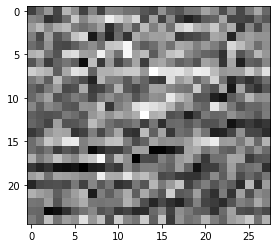

In [110]:
plt.imshow(W,cmap='gray')

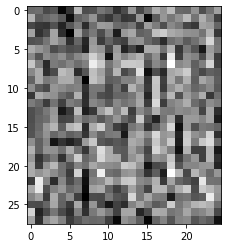

In [111]:
plt.imshow(H, cmap='gray')

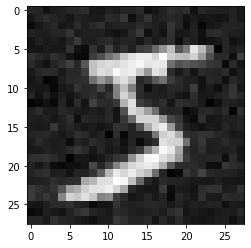

In [112]:
plt.imshow(np.dot(H, W), cmap='gray')

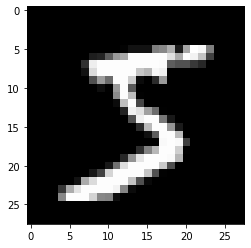

In [113]:
plt.imshow(temp, cmap='gray')

In [123]:
def pca(X, ndims):

    rows,cols=X.shape
    mean_vec = np.mean(X, axis=0)
    X = X - mean_vec
    cov_mat = np.cov(X, rowvar=0)
    D, V = np.linalg.eig(cov_mat)
    eig_val = np.argsort(D)
    top_eig_val = eig_val[-1:-(ndims+1):-1]
    top_eig_vecs = V[:,top_eig_val].astype(float)



    return mean_vec, top_eig_vecs

def pca_projection(X, mean_vec, eig_vecs):
    X -= mean_vec
    weights = X@eig_vecs


    return weights

def pca_reconstruction(weights, mean_vec, eig_vecs):
    reconstruction = weights @ eig_vecs.T + mean_vec


    return reconstruction

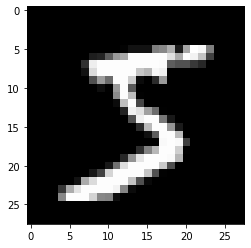

In [125]:
mean_vec, top_eig_vecs = pca(temp,28)
weights = pca_projection(temp,mean_vec,top_eig_vecs)
reconstruction = pca_reconstruction(weights,mean_vec,top_eig_vecs)
plt.imshow(reconstruction, cmap='gray')

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import pandas as pd

data= sklearn.datasets.fetch_olivetti_faces()
temp = data.data[0].reshape(64, 64)

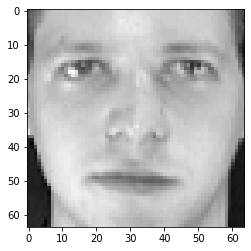

In [116]:
H, W = NMF(temp, 64)
plt.imshow(temp, cmap='gray')


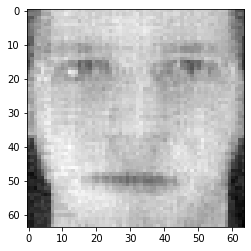

In [117]:
plt.imshow(np.dot(H, W),cmap='gray')